In [ ]:
# This jupyter notebook is for COMP9517 lab03

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Getting the data from keras
from tensorflow import keras

In [3]:
# import the data set from keras
# Finding more information can enter this website
# Source: https://github.com/zalandoresearch/fashion-mnist
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
# check the type of the fashion_mnist
type(fashion_mnist)

module

In [5]:
# Import date the the fanshion mnist
(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()

In [6]:
# check the length of. the training image and training labels
# If correct the data should be 60000
print(f"training images: {len(train_images)}")
print(f"training labels: {len(train_labels)}")

training images: 60000
training labels: 60000


In [7]:
# check the length of. the testing image and testing labels
# If correct the data should be 10000
print(f"testing images: {len(test_images)}")
print(f"testing labels: {len(test_labels)}")

testing images: 10000
testing labels: 10000


In [8]:
# check the shape of the training images
print(f"The shape of the training images: {train_images.shape}")
print(f"The shape of the testing images: {test_images.shape}")
print(f"The shape of the training labels: {train_labels.shape}")
print(f"The shape of the testing labels: {test_labels.shape}")

The shape of the training images: (60000, 28, 28)
The shape of the testing images: (10000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing labels: (10000,)


In [9]:
# Check the labels of data
# from 0 - 9, so there are 10 kind of things in the label
print(f"The minimum of the training labels: {np.min(train_labels)}")
print(f"The maximum of the training labels: {np.max(train_labels)}")

The minimum of the training labels: 0
The maximum of the training labels: 9


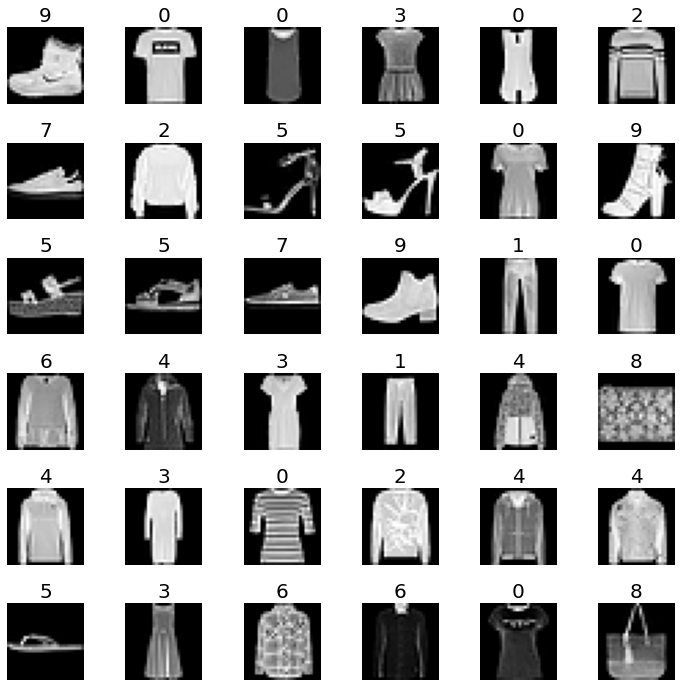

In [10]:
# The idea of this printing code is from the following source
# Source: https://medium.com/analytics-vidhya/my-first-image-classifying-model-fashion-mnist-89c85f4aa4e1

# The meaning of each tag
#   0	T-shirt/top
#   1	Trouser
#   2	Pullover
#   3	Dress
#   4	Coat
#   5	Sandal
#   6	Shirt
#   7	Sneaker
#   8	Bag
#   9	Ankle boot

# create 10 labels represent 10 kinds of categories
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# print the 6 * 6 sample image in the dataset
row = 6
col = 6
plt.figure(figsize = (6 * 2, 6 * 2))
for r in range(row):
    for c in range(col):
        # Counting the current location of the image
        current_location = col * r + c
        # The current index of the image
        next_index = current_location + 1
        plt.subplot(row, col, next_index)
        # can also print the image in binary
        plt.imshow(train_images[current_location], cmap="gray")
        plt.title(class_names[train_labels[current_location]],fontsize=20)
        # This is to seperate the image from each other
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        plt.axis('off')
plt.show()

In [11]:
# Cutting the training data and test data -----> 2000 training, 500 test
x_train = train_images[:2000]
y_train = train_labels[:2000]
print(len(x_train))
print(len(y_train))
x_test = test_images[:500]
y_test = test_labels[:500]
print(len(x_test))
print(len(y_test))
# print(x_train.shape)

2000
2000
500
500


####  This is the KNN classifier

In [12]:
# Import the KNN tool package
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Data reshape 3D -> 2D
# Change the dimension
# Source: https://stackoverflow.com/questions/34972142/sklearn-logistic-regression-valueerror-found-array-with-dim-3-estimator-expec
def reshape_2_2d(input_dataset):
    number, x_value, y_value = input_dataset.shape
    dataset_2d_dataset = input_dataset.reshape((number,x_value*y_value))
    return dataset_2d_dataset

In [14]:
# This dataset x_train_2d has been changed to 2 dimension
# This dataset x_test_2d has been changed to 2 dimension
x_train_2d = reshape_2_2d(x_train)
x_test_2d = reshape_2_2d(x_test)

In [15]:
# The n_neighbors=3 is due to KNeighboursClassifier [k=3]
knn_classifier = KNeighborsClassifier(n_neighbors=3)
# fit the knn classifier
knn_classifier.fit(x_train_2d,y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn_predict_y = knn_classifier.predict(x_test_2d)

In [49]:
# The macro avg also the average accuracy 
# You can also the more detail in the following report
# Print the precision score of KNN classifier
KNN_precision = metrics.precision_score(y_test,knn_predict_y,average="macro")
# Print the recall score of KNN classifier
KNN_recall = metrics.recall_score(y_test,knn_predict_y,average="macro")
# Print the F1 score of KNN classifier
KNN_f1_score = metrics.f1_score(y_test,knn_predict_y,average="macro")
# print the result
print(f"The precision of this KNN classifier is {KNN_precision}")
print(f"The recall socre of this KNN classifier is {KNN_recall}")
print(f"The f1_score of this KNN classifier is {KNN_f1_score}")

The precision of this KNN classifier is 0.8066004943479369
The recall socre of this KNN classifier is 0.8009992675824751
The f1_score of this KNN classifier is 0.8019357801276297


In [62]:
# print(y_test.shape)
# print(predict_y.shape)
# The tag information
#   0	T-shirt/top
#   1	Trouser
#   2	Pullover
#   3	Dress
#   4	Coat
#   5	Sandal
#   6	Shirt
#   7	Sneaker
#   8	Bag
#   9	Ankle boot
# This kind of report can get all the training info in 10 tags
KNN_report = metrics.classification_report(y_test,knn_predict_y)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        55
           1       0.93      0.98      0.95        52
           2       0.61      0.66      0.64        65
           3       0.80      0.80      0.80        46
           4       0.70      0.54      0.61        57
           5       0.94      0.85      0.89        39
           6       0.49      0.53      0.51        47
           7       0.90      0.91      0.91        47
           8       1.00      0.93      0.96        44
           9       0.92      0.96      0.94        48

    accuracy                           0.79       500
   macro avg       0.81      0.80      0.80       500
weighted avg       0.80      0.79      0.79       500



In [63]:
# Here is the confusion matrix of this KNN classifier
KNN_confusion_matrix = metrics.confusion_matrix(y_test,knn_predict_y)
print("KNeighborsClassifier Confusion Matrix:")
print(KNN_confusion_matrix)

KNeighborsClassifier Confusion Matrix:
[[46  1  2  1  0  0  5  0  0  0]
 [ 0 51  0  1  0  0  0  0  0  0]
 [ 3  0 43  1  9  0  9  0  0  0]
 [ 3  2  0 37  2  0  2  0  0  0]
 [ 1  1 10  4 31  0 10  0  0  0]
 [ 0  0  1  0  0 33  0  3  0  2]
 [ 6  0 12  2  2  0 25  0  0  0]
 [ 0  0  0  0  0  2  0 43  0  2]
 [ 1  0  2  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0  2  0 46]]


#### This is the SGD classifier

In [36]:
# Import the Tool package from the linear model 
# You can find more info from this website
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
from sklearn.linear_model import SGDClassifier

In [47]:
# Set up the SGB classifier
# This max_iter is 250 which is provided by the instruction
SGD_classifier = SGDClassifier(max_iter=250)
# Using the training data to fit the model
SGD_classifier.fit(x_train_2d,y_train)

SGDClassifier(max_iter=250)

In [48]:
# using the test data to get the prediction result
sgd_predict_y = SGD_classifier.predict(x_test_2d)

In [43]:
# Print the precision score of SGD classifier
SGD_precision = metrics.precision_score(y_test,sgd_predict_y,average="macro")
# Print the recall score of SGD classifier
SGD_recall = metrics.recall_score(y_test,sgd_predict_y,average="macro")
# Print the F1 score of SGD classifier
SGD_f1_score = metrics.f1_score(y_test,sgd_predict_y,average="macro")
# print the result of SGD classifier
print(f"The precision of this SGD classifier is {SGD_precision}")
print(f"The recall socre of this SGD classifier is {SGD_recall}")
print(f"The f1_score of this SGD classifier is {SGD_f1_score}")

The precision of this SGD classifier is 0.8044815216782863
The recall socre of this SGD classifier is 0.787966631450248
The f1_score of this SGD classifier is 0.7871372748125565


In [67]:
# print the training info of sgd classifier
SGD_report = metrics.classification_report(y_test,sgd_predict_y)
print(SGD_report)

              precision    recall  f1-score   support

           0       0.76      0.95      0.85        55
           1       0.93      0.98      0.95        52
           2       0.71      0.78      0.74        65
           3       0.78      0.76      0.77        46
           4       0.62      0.68      0.65        57
           5       0.97      0.92      0.95        39
           6       0.71      0.26      0.37        47
           7       0.90      0.96      0.93        47
           8       0.91      0.98      0.95        44
           9       0.93      0.90      0.91        48

    accuracy                           0.81       500
   macro avg       0.82      0.82      0.81       500
weighted avg       0.81      0.81      0.80       500



In [68]:
# The confusion matrix of sgd classifier
SGD_confusion_matrix = metrics.confusion_matrix(y_test,sgd_predict_y)
print("SGDClassifier Confusion Matrix:")
print(SGD_confusion_matrix)

SGDClassifier Confusion Matrix:
[[52  0  2  1  0  0  0  0  0  0]
 [ 0 51  0  1  0  0  0  0  0  0]
 [ 0  0 51  1 13  0  0  0  0  0]
 [ 3  2  0 35  3  0  2  0  1  0]
 [ 1  2 10  3 39  0  2  0  0  0]
 [ 0  0  0  0  0 36  0  2  0  1]
 [12  0  9  4  8  0 12  0  2  0]
 [ 0  0  0  0  0  0  0 45  0  2]
 [ 0  0  0  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  3  1 43]]


#### This is the SGD classifier

In [69]:
# This DecisionTreeClassifier is in the tree moudle
# You can find more information from the following website
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

In [70]:
# Set up the Decision classifier
DT_classifier = DecisionTreeClassifier()
# Using the training data to fit the model
DT_classifier.fit(x_train_2d,y_train)

DecisionTreeClassifier()

In [71]:
# using the test data to get the prediction result
dt_predict_y = DT_classifier.predict(x_test_2d)

In [72]:
# Print the precision score of decision tree classifier
DT_precision = metrics.precision_score(y_test,dt_predict_y,average="macro")
# Print the recall score of decision tree classifier
DT_recall = metrics.recall_score(y_test,dt_predict_y,average="macro")
# Print the F1 score of decision tree classifier
DT_f1_score = metrics.f1_score(y_test,dt_predict_y,average="macro")
# print the result of DT 
print(f"The precision of this SGD classifier is {DT_precision}")
print(f"The recall socre of this SGD classifier is {DT_recall}")
print(f"The f1_score of this SGD classifier is {DT_f1_score}")

The precision of this SGD classifier is 0.7399399754585514
The recall socre of this SGD classifier is 0.7356476368057994
The f1_score of this SGD classifier is 0.7343099496595806


In [74]:
# print the training information of decision Tree
DT_report = metrics.classification_report(y_test,dt_predict_y)
print(DT_report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        55
           1       0.85      0.90      0.88        52
           2       0.57      0.55      0.56        65
           3       0.62      0.74      0.67        46
           4       0.56      0.44      0.49        57
           5       0.82      0.85      0.84        39
           6       0.40      0.49      0.44        47
           7       0.85      0.98      0.91        47
           8       0.94      0.75      0.84        44
           9       0.93      0.88      0.90        48

    accuracy                           0.72       500
   macro avg       0.74      0.74      0.73       500
weighted avg       0.73      0.72      0.72       500



In [75]:
# print the confusion matrix of the Decision Tree
DT_confusion_matrix = metrics.confusion_matrix(y_test,dt_predict_y)
print("DecisionTreeClassifier Confusion Matrix:")
print(DT_confusion_matrix)

DecisionTreeClassifier Confusion Matrix:
[[43  2  0  4  1  0  5  0  0  0]
 [ 1 47  0  2  0  1  1  0  0  0]
 [ 1  1 36  2 11  3 11  0  0  0]
 [ 1  3  2 34  1  0  5  0  0  0]
 [ 0  2 15  4 25  1 10  0  0  0]
 [ 1  0  1  0  0 33  0  3  1  0]
 [ 4  0  7  9  3  0 23  0  1  0]
 [ 0  0  0  0  0  0  0 46  0  1]
 [ 0  0  2  0  4  1  2  0 33  2]
 [ 0  0  0  0  0  1  0  5  0 42]]
